In [1]:
import spacy
import json

In [2]:
def load_data(file):
    with open (file, "r", encoding="utf-8") as f:
        data = json.load(f)
    return (data)

def write_data(file, data):
    with open (file, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

In [3]:
nlp = spacy.load("output/model-best")

In [11]:
docs = load_data("data/formal_test.json")
print (docs[10])

['Camps Nazi extermination camps Auschwitz II-Birkenau Belzec Chelmno Jasenovac Majdanek Sajmište Sobibor Treblinka', {'entities': [[0, 5, 'CAMP'], [31, 40, 'CAMP'], [53, 59, 'CAMP'], [60, 67, 'CAMP'], [68, 77, 'CAMP'], [96, 103, 'CAMP'], [104, 113, 'CAMP']]}]


In [5]:
from spacy.training import offsets_to_biluo_tags
def get_cleaned_label(label: str):
    if "-" in label:
        return label.split("-")[1]
    else:
        return label
    
def create_total_target_vector(docs):
    target_vector = []
    for doc in docs:
        print (doc)
        new = nlp.make_doc(doc[0])
        entities = doc[1]["entities"]
        bilou_entities = offsets_to_biluo_tags(new, entities)
        final = []
        for item in bilou_entities:
            final.append(get_cleaned_label(item))
        target_vector.extend(final)
    return target_vector

In [6]:
def create_prediction_vector(text):
    return [get_cleaned_label(prediction) for prediction in get_all_ner_predictions(text)]

def create_total_prediction_vector(docs: list):
    prediction_vector = []
    for doc in docs:
        prediction_vector.extend(create_prediction_vector(doc[0]))
    return prediction_vector

def get_all_ner_predictions(text):
    doc = nlp(text)
    entities = [(e.start_char, e.end_char, e.label_) for e in doc.ents]
    bilou_entities = offsets_to_biluo_tags(doc, entities)
    return bilou_entities

In [7]:
def get_model_labels():
    labels = list(nlp.get_pipe("ner").labels)
    labels.append("O")
    return sorted(labels)
def get_dataset_labels():
    return sorted(set(create_total_target_vector(docs)))

In [8]:
# sorted(set(create_total_target_vector(docs)))

In [8]:
from sklearn.metrics import confusion_matrix

def generate_confusion_matrix(docs): 
    classes = sorted(set(create_total_target_vector(docs)))
    y_true = create_total_target_vector(docs)
    y_pred = create_total_prediction_vector(docs)
    print (y_true)
    print (y_pred)
    return confusion_matrix(y_true, y_pred, classes)

In [10]:
# generate_confusion_matrix(docs)

In [9]:
from matplotlib import pyplot
import numpy

def plot_confusion_matrix(docs, classes, normalize=False, cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   
    title = 'Confusion Matrix, for SpaCy NER'

    # Compute confusion matrix
    cm = generate_confusion_matrix(docs)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]

    fig, ax = pyplot.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=numpy.arange(cm.shape[1]),
           yticks=numpy.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    pyplot.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm, ax, pyplot

['This file has been extracted from another file:  Mass Grave at Bergen-Belsen concentration camp - Fritz Klein - IWM BU4260.jpg', {'entities': [[63, 76, 'CAMP']]}]
['Gertrude "Traute or Trude" Kleinova  was a three-time world champion table tennis player, winning the women\'s team world championship twice, and the world mixed doubles once. She and her first husband were deported by the Nazis to the Theresienstadt concentration camp and eventually sent to the Auschwitz concentration camp, where her husband was killed.  She was posthumously inducted into the International Jewish Sports Hall of Fame.', {'entities': [[235, 249, 'CAMP'], [296, 305, 'CAMP']]}]
["Interwar period Stolp was not directly affected by the fighting in the First World War. The trams did not operate during the war, returning to the streets in 1919. Demographic growth remained high, although development slowed, because the city became peripheral, the Kreis  being situated on post-war Germany's border with the Polish 

C:\Users\wma22\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=['CAMP', 'O'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


(array([[  280,     6],
        [    2, 11043]], dtype=int64),
 <AxesSubplot:title={'center':'Confusion Matrix, for SpaCy NER'}, xlabel='Predicted label', ylabel='True label'>,
 <module 'matplotlib.pyplot' from 'C:\\Users\\wma22\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>)

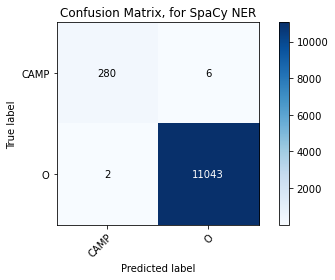

In [10]:

plot_confusion_matrix(docs,classes=get_dataset_labels(),normalize=False)